In [12]:
using JLD, Plots, LaTeXStrings
include(".././utils/utils.jl");

In [57]:
data_global_measure = load("../../data/07_07_2023/GS_Pn_U-8.0_N64_LA16_beta18.0_seed1039.jld")
Pn2_up = data_global_measure["Pn_up"]
Pn2_dn = data_global_measure["Pn_dn"]
Pmn2_global = [Pn2_up[:, i] * transpose(Pn2_dn[:, i]) for i in 1:size(Pn2_up)[2]]
L = 2*size(Pn2_up)[1] - 1
Pn2_global = zeros(eltype(Pmn2_global[1]), L, size(Pn2_up)[2])
for i in 1:size(Pn2_up)[2]
    @views sum_anti_diag!(Pn2_global[:, i], Pmn2_global[i])
end

data_local_measure = load("../../data/07_07_2023/GS_Pn_U-8.0_N64_Lx8_Ly8_LA16_beta18.0_seed1039.jld")
Pn2_up = data_local_measure["Pn_up"]
Pn2_dn = data_local_measure["Pn_dn"]
Pmn2_local = [Pn2_up[:, i] * transpose(Pn2_dn[:, i]) for i in 1:size(Pn2_up)[2]]
L = 2*size(Pn2_up)[1] - 1
Pn2_local = zeros(eltype(Pmn2_local[1]), L, size(Pn2_up)[2])
for i in 1:size(Pn2_up)[2]
    @views sum_anti_diag!(Pn2_local[:, i], Pmn2_local[i])
end

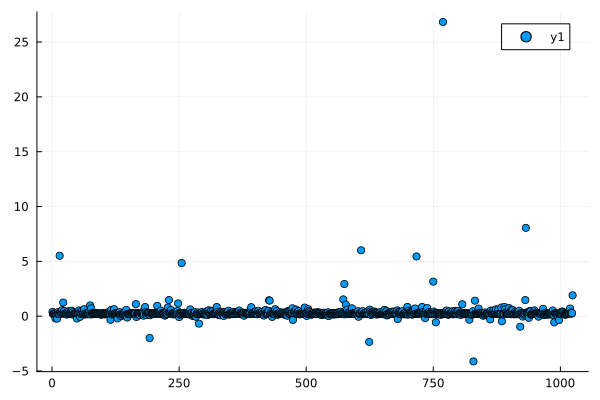

In [58]:
scatter(
    real(Pn2_local[17, :])
)